In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
trees = pd.read_csv('./arbolado-publico-lineal.csv')

In [4]:
barrios = pd.read_csv('./barrios.csv')
drop = ['Dique 1', 'Dique 3', 'Dique 4']
zone = [b.upper() for b in barrios['Barrio']]
barrios.set_index(np.array(zone), inplace=True)

In [5]:
trees_by_area = trees.groupby(['barrio']).size()

In [6]:
barrios['arboles']= (trees_by_area)
barrios['habitantes'] = np.array([hh*1000 for hh in barrios['habitantes']])
barrios['superficie_km2'] = np.array([float(ss.replace(',','.')) for ss in barrios['superficie_km2']])

<IPython.core.display.Javascript object>


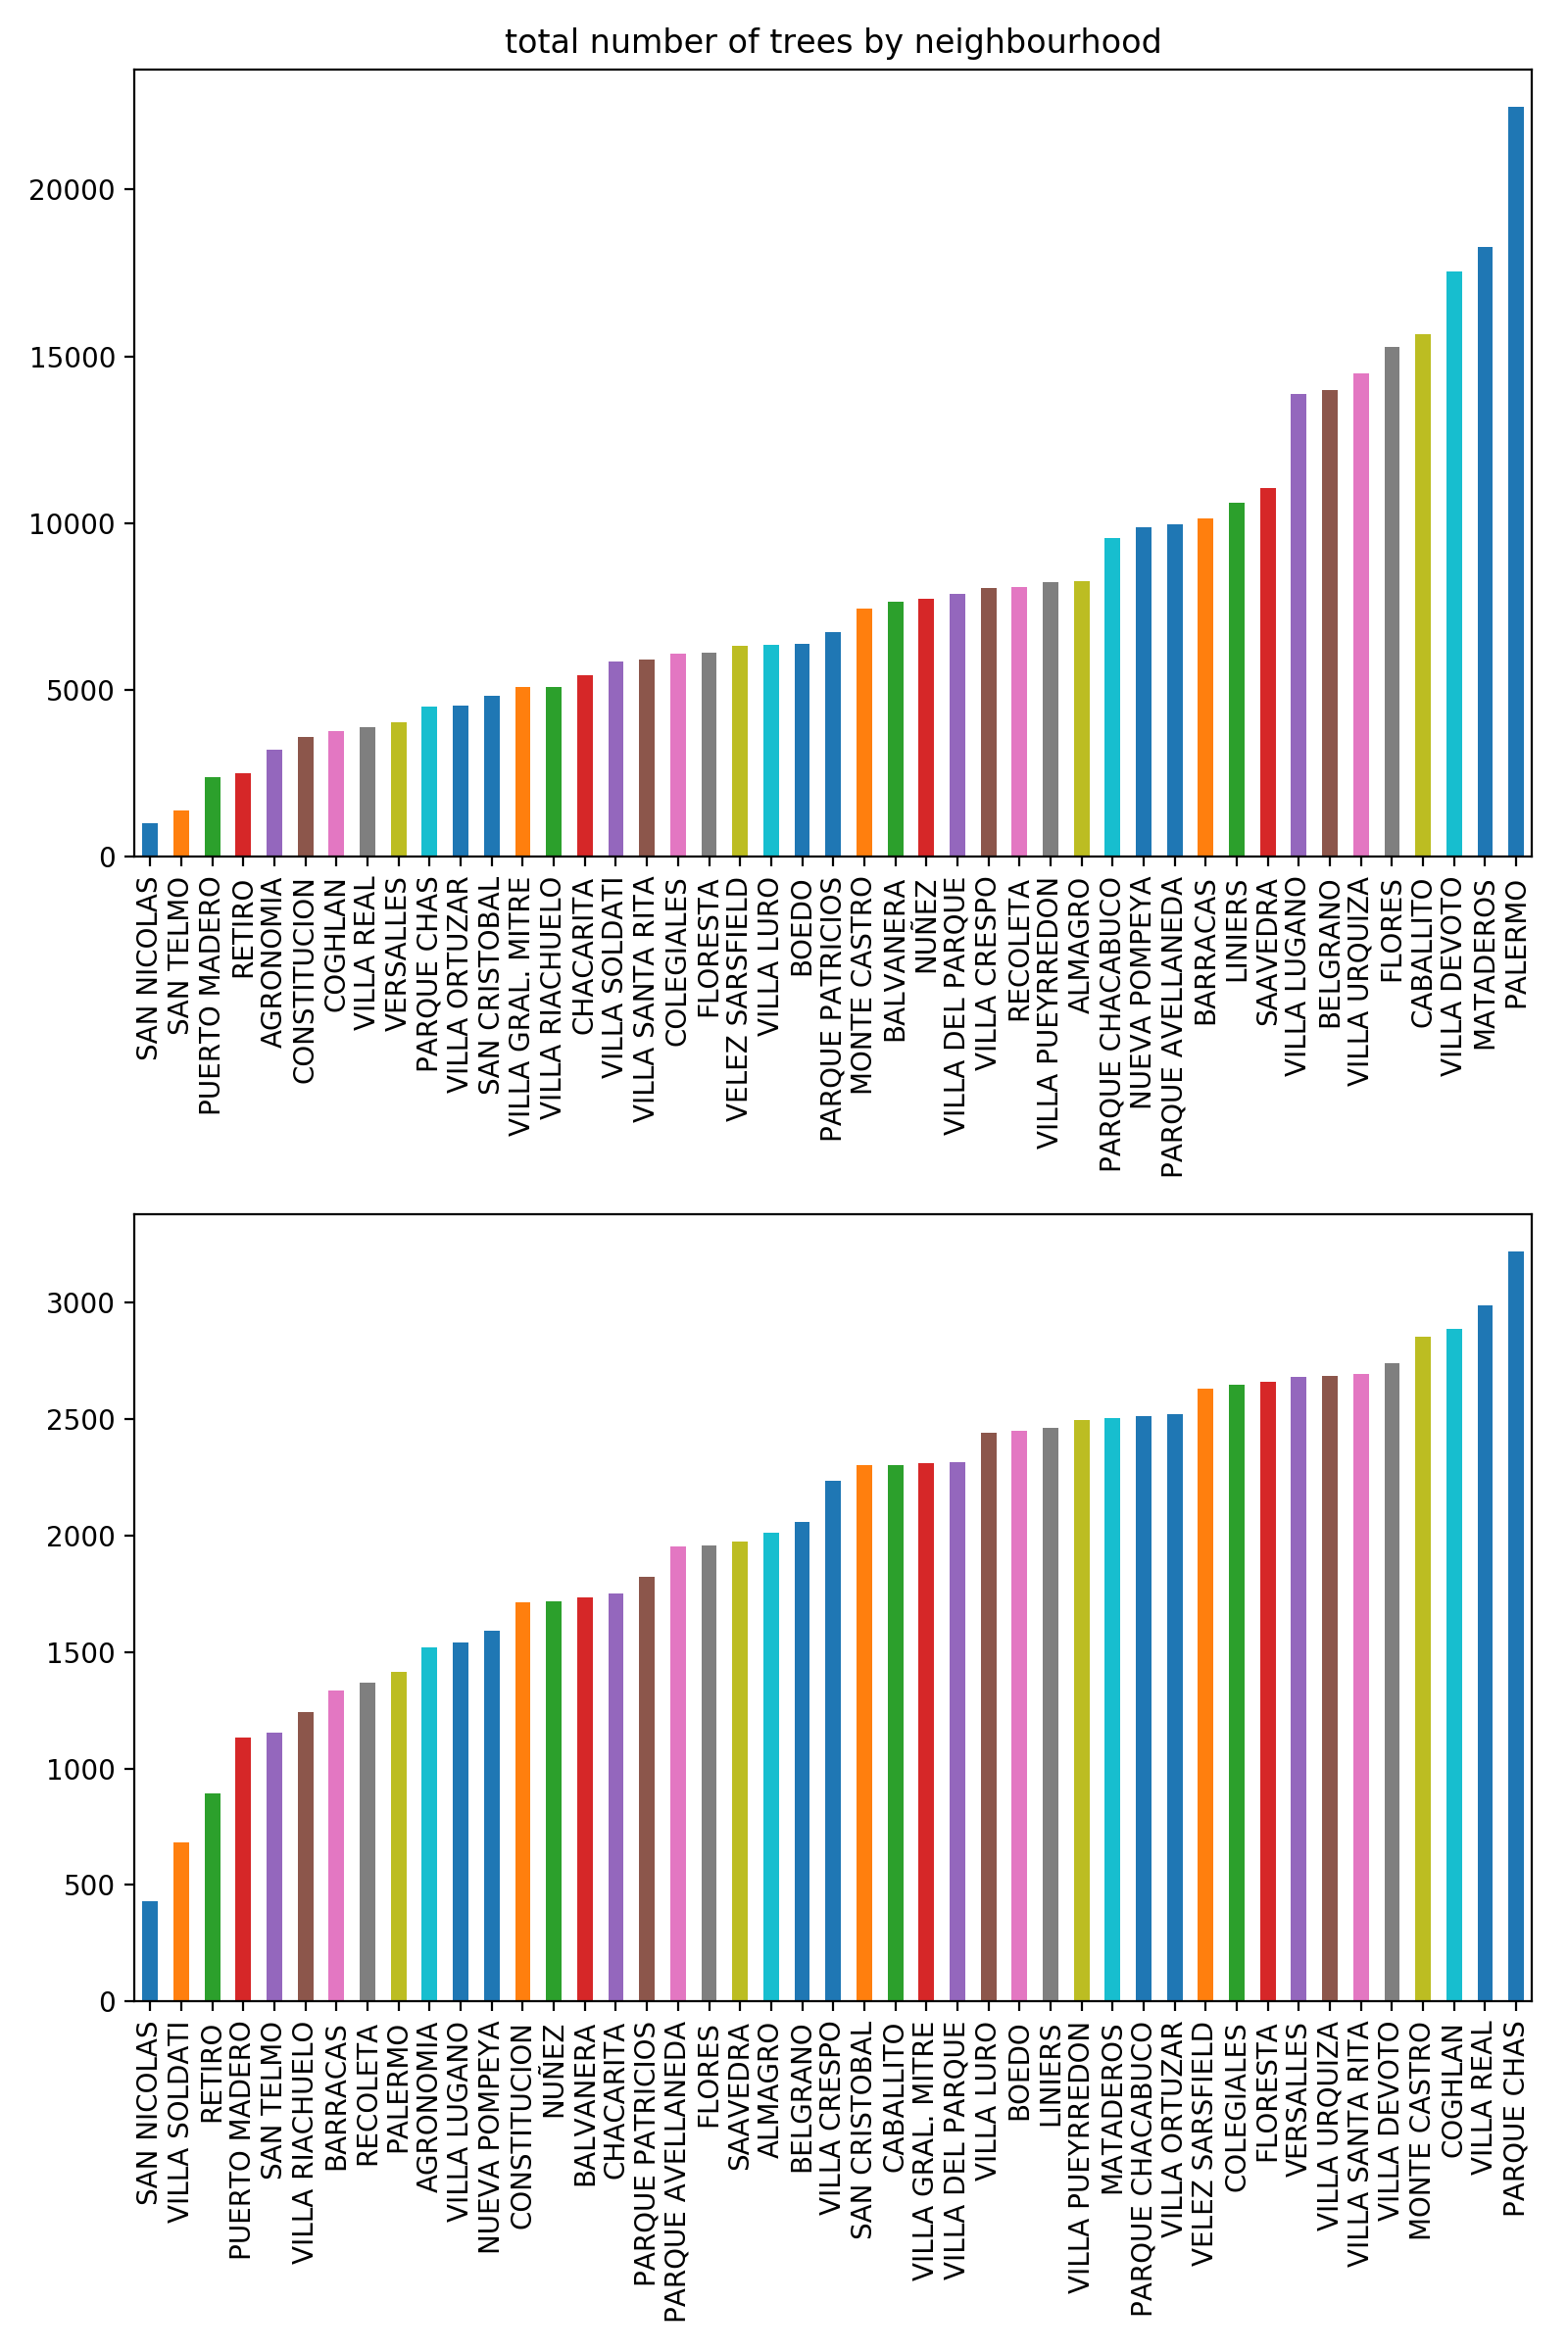

In [7]:
plt.figure(figsize = (8,12))
plt.subplot(2,1,1)
plt.title('total number of trees by neighbourhood')
(barrios['arboles'][~pd.isnull(barrios['arboles'])]).sort_values().plot.bar()

plt.subplot(2,1,2)
filt = ~pd.isnull(barrios['arboles'])
(barrios['arboles'][filt]/barrios['superficie_km2'][filt]).sort_values().plot.bar()
plt.tight_layout()